**Uploading Files to Google Colab Environment**

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zahidhasanluna","key":"cf4a7c6c56d8ecc559bd23445bbf1cc8"}'}

**Installing the Kaggle API in a Google Colab Notebook**

In [ ]:
!pip install -q kaggle


**Setting Up Kaggle API Credentials in Google Colab**

In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle (1).json


/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `chmod 600 ~/.kaggle/kaggle (1).json'


**Downloading the N-BaIoT Dataset from Kaggle onto Google Colab**

In [ ]:
!kaggle datasets download -d mkashifn/nbaiot-dataset

100% 1.75G/1.75G [01:17<00:00, 26.8MB/s]
100% 1.75G/1.75G [01:17<00:00, 24.2MB/s]


**Changing Directory to /content/ and Extracting the N-BaIoT Dataset Zip File in Google Colab**

In [ ]:
# First, ensure you're in the correct directory where the dataset is downloaded
%cd /content/

# Unzipping the N-BaIoT dataset
!unzip 'nbaiot-dataset.zip' -d '/content/nbaiot-dataset/'


/content
Archive:  nbaiot-dataset.zip
  inflating: /content/nbaiot-dataset/1.benign.csv  
  inflating: /content/nbaiot-dataset/1.gafgyt.combo.csv  
  inflating: /content/nbaiot-dataset/1.gafgyt.junk.csv  
  inflating: /content/nbaiot-dataset/1.gafgyt.scan.csv  
  inflating: /content/nbaiot-dataset/1.gafgyt.tcp.csv  
  inflating: /content/nbaiot-dataset/1.gafgyt.udp.csv  
  inflating: /content/nbaiot-dataset/1.mirai.ack.csv  
  inflating: /content/nbaiot-dataset/1.mirai.scan.csv  
  inflating: /content/nbaiot-dataset/1.mirai.syn.csv  
  inflating: /content/nbaiot-dataset/1.mirai.udp.csv  
  inflating: /content/nbaiot-dataset/1.mirai.udpplain.csv  
  inflating: /content/nbaiot-dataset/2.benign.csv  
  inflating: /content/nbaiot-dataset/2.gafgyt.combo.csv  
  inflating: /content/nbaiot-dataset/2.gafgyt.junk.csv  
  inflating: /content/nbaiot-dataset/2.gafgyt.scan.csv  
  inflating: /content/nbaiot-dataset/2.gafgyt.tcp.csv  
  inflating: /content/nbaiot-dataset/2.gafgyt.udp.csv  
  inflati

**Importing Libraries and Reading Multiple CSV Files from the N-BaIoT Dataset in Google Colab**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [ ]:
import pandas as pd

# Define the base path where the dataset is unzipped
base_path = '/content/nbaiot-dataset/'

# Reading the CSV files
benign_df = pd.read_csv(base_path + '5.benign.csv')
g_c_df = pd.read_csv(base_path + '5.gafgyt.combo.csv')
g_j_df = pd.read_csv(base_path + '5.gafgyt.junk.csv')
g_s_df = pd.read_csv(base_path + '5.gafgyt.scan.csv')
g_t_df = pd.read_csv(base_path + '5.gafgyt.tcp.csv')
g_u_df = pd.read_csv(base_path + '5.gafgyt.udp.csv')
m_a_df = pd.read_csv(base_path + '5.mirai.ack.csv')
m_sc_df = pd.read_csv(base_path + '5.mirai.scan.csv')
m_sy_df = pd.read_csv(base_path + '5.mirai.syn.csv')
m_u_df = pd.read_csv(base_path + '5.mirai.udp.csv')
m_u_p_df = pd.read_csv(base_path + '5.mirai.udpplain.csv')


**Labeling Data Rows by Type in the N-BaIoT Dataset**

In [ ]:
benign_df['type'] = 'benign'
m_u_df['type'] = 'mirai_udp'
g_c_df['type'] = 'gafgyt_combo'
g_j_df['type'] = 'gafgyt_junk'
g_s_df['type'] = 'gafgyt_scan'
g_t_df['type'] = 'gafgyt_tcp'
g_u_df['type'] = 'gafgyt_udp'
m_a_df['type'] = 'mirai_ack'
m_sc_df['type'] = 'mirai_scan'
m_sy_df['type'] = 'mirai_syn'
m_u_p_df['type'] = 'mirai_udpplain'

In [ ]:
df = pd.concat([benign_df, m_u_df, g_c_df,
                g_j_df, g_s_df, g_t_df,
                g_u_df, m_a_df, m_sc_df,
                m_sy_df, m_u_p_df],
                axis=0, sort=False, ignore_index=True)

In [ ]:
df["type"].value_counts()

mirai_udp         156248
gafgyt_tcp        104510
gafgyt_udp        104011
mirai_scan         96781
mirai_syn          65746
benign             62154
gafgyt_combo       61380
mirai_ack          60554
mirai_udpplain     56681
gafgyt_junk        30898
gafgyt_scan        29297
Name: type, dtype: int64

**Creating a Bar Chart to Visualize Class Distribution in a DataFrame**

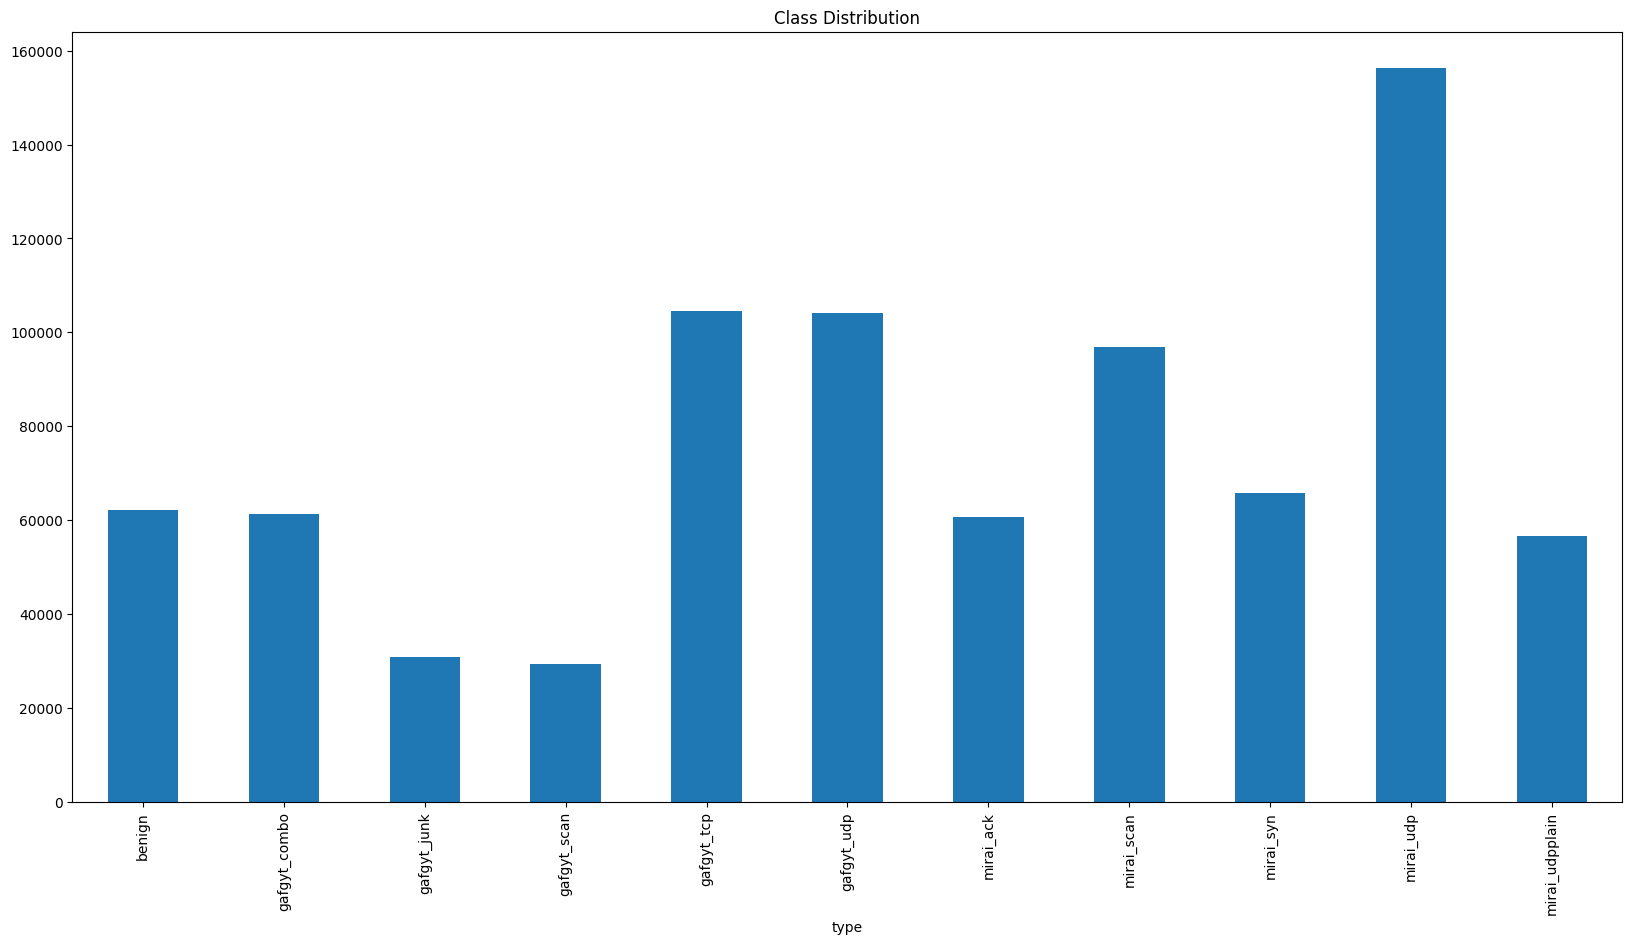

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
plt.title("Class Distribution")
df.groupby("type").size().plot(kind='bar')
plt.show()


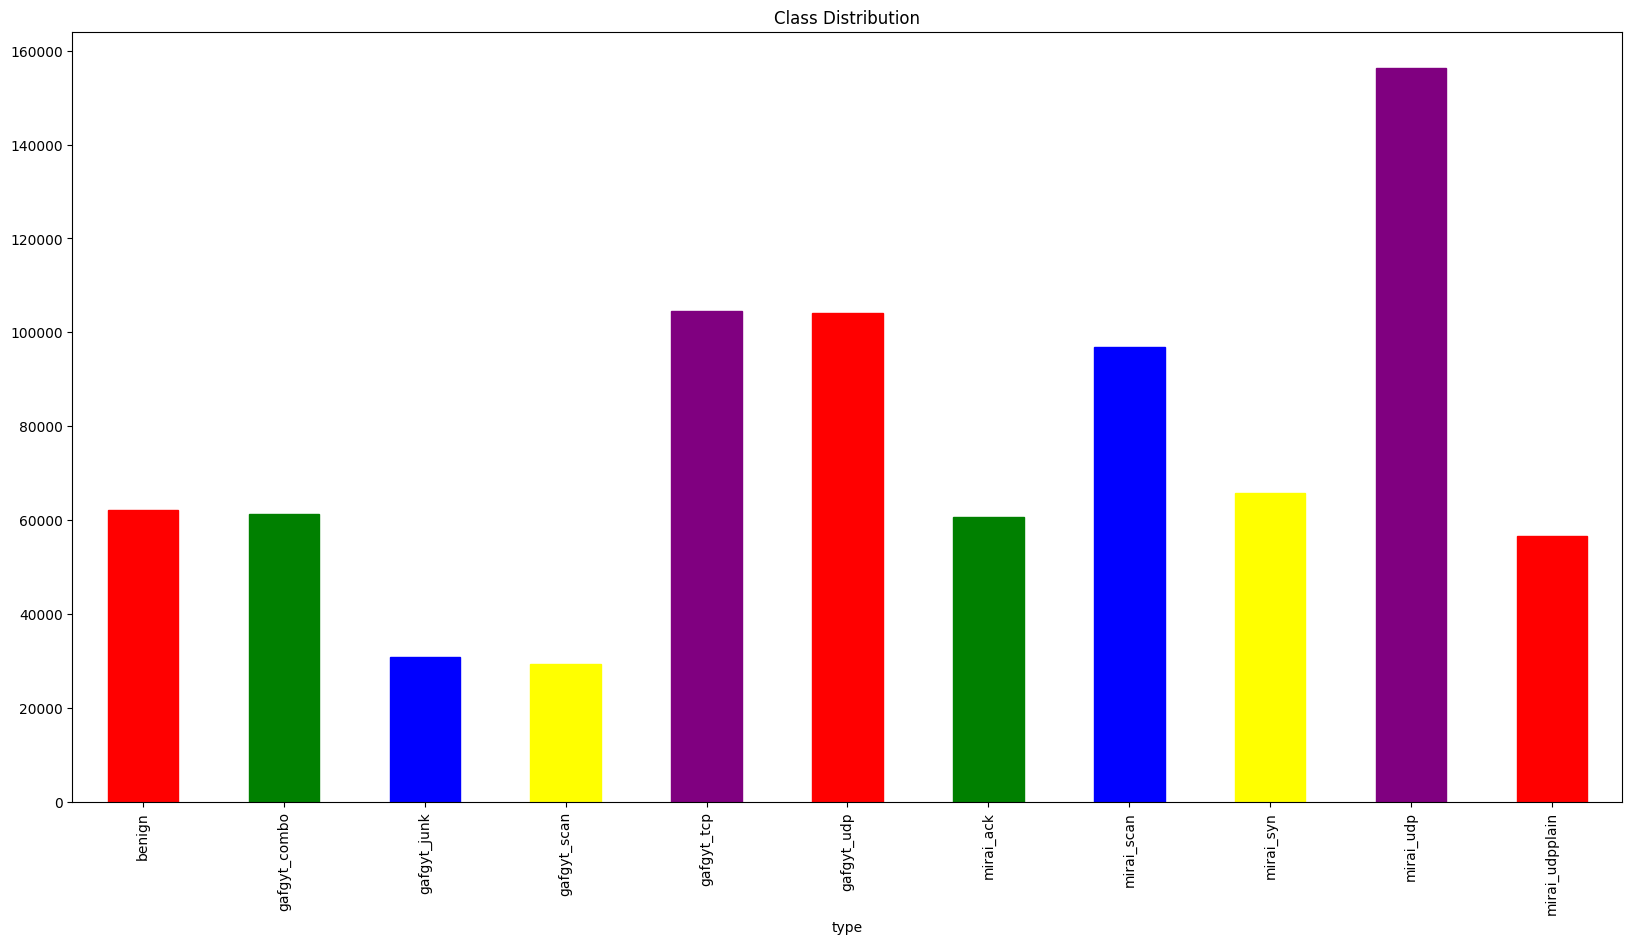

In [ ]:
from matplotlib import pyplot as plt

# Create a figure with a custom size
plt.figure(figsize=(20,10))

# Set the title of the plot
plt.title("Class Distribution")

# Plot the bar chart and assign the output to ax
ax = df.groupby("type").size().plot(kind='bar')

# Define a list of colors for the bars
colors = ['red', 'green', 'blue', 'yellow', 'purple']

# Loop through the bars and set the color for each one
for i, bar in enumerate(ax.patches):
    # Use the modulo operator to cycle through the colors list
    bar.set_color(colors[i % len(colors)])

# Show the plot
plt.show()



**Inspecting DataFrame Structure, Randomizing Rows, and Displaying Top Entries**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828260 entries, 0 to 828259
Columns: 116 entries, MI_dir_L5_weight to type
dtypes: float64(115), object(1)
memory usage: 733.0+ MB


In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,type
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.0,0.000000e+00,60.0,0.000000e+00,0.0,0.0,gafgyt_tcp
1,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.0,0.000000e+00,60.0,0.000000e+00,0.0,0.0,gafgyt_tcp
2,121.704074,387.867529,58352.790572,189.881949,360.536930,61709.267980,461.282793,340.975847,63198.773298,3385.566105,...,0.0,0.0,1.000000,566.0,0.000000e+00,566.0,0.000000e+00,0.0,0.0,mirai_ack
3,32.538207,74.644126,15.131918,42.233139,74.590811,26.806266,74.444385,77.911453,2852.890100,668.291270,...,0.0,0.0,3.666914,74.0,9.536743e-07,74.0,9.094947e-13,0.0,0.0,gafgyt_scan
4,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.0,0.000000e+00,60.0,0.000000e+00,0.0,0.0,gafgyt_udp


**Data Preprocessing: Splitting, Label Encoding, and Scaling for Machine Learning**

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["type"])

In [ ]:
features = list(train_df.columns)
features.remove("type")
#features

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_df["type"] = label_encoder.fit_transform(train_df["type"])
test_df["type"] = label_encoder.transform(test_df["type"])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_df[features] = scaler.fit_transform(train_df[features])
test_df[features] = scaler.transform(test_df[features])

In [ ]:
X_train = train_df[features].values
y_train = train_df["type"].values

X_test = test_df[features].values
y_test = test_df["type"].values

**Feature Importance Analysis Using Extra Trees Classifier and Sorting Results**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel


clf = ExtraTreesClassifier(n_estimators=50, n_jobs=-1)
clf = clf.fit(X_train, y_train)
clf.feature_importances_

array([1.70552031e-02, 4.54279568e-03, 5.28588655e-03, 9.82785847e-03,
       1.60841033e-02, 3.47225371e-03, 1.72211080e-02, 9.52309763e-03,
       5.00606350e-03, 3.38614318e-02, 4.16494300e-02, 1.66938095e-02,
       3.99475653e-02, 3.89443557e-02, 6.25838014e-02, 6.75140698e-03,
       4.47857433e-03, 8.91333447e-04, 1.29662782e-02, 6.08928075e-03,
       6.83590762e-03, 2.09128412e-02, 9.81983823e-03, 6.54277191e-03,
       3.55098583e-02, 2.36454925e-02, 2.01932397e-02, 3.12662981e-02,
       4.32433298e-02, 4.71470783e-02, 5.94598706e-03, 2.67076446e-03,
       1.16749127e-03, 3.44864328e-03, 6.54953929e-04, 1.24837598e-06,
       1.78735910e-06, 6.52667839e-03, 3.35981854e-03, 2.33029707e-04,
       5.08126098e-03, 8.84211059e-04, 1.06513956e-06, 8.49929446e-05,
       1.09730744e-02, 4.00240966e-03, 1.54914217e-03, 7.03279925e-03,
       1.65071405e-04, 8.07090665e-04, 4.84731842e-05, 1.38553611e-02,
       7.61662996e-03, 1.37971171e-03, 9.99401543e-03, 1.92026985e-03,
      

In [ ]:
ext=pd.DataFrame(clf.feature_importances_,columns=["extratrees_importance"])
ext = ext.sort_values(['extratrees_importance'], ascending=False)
feature_index = [features[i] for i in list(ext.index)]
ext["Feature_Name"] = feature_index
ext

,extratrees_importance,Feature_Name
14,6.258380e-02,MI_dir_L0.01_variance
29,4.714708e-02,H_L0.01_variance
28,4.324333e-02,H_L0.01_mean
10,4.164943e-02,MI_dir_L0.1_mean
12,3.994757e-02,MI_dir_L0.01_weight
...,...,...
93,6.969893e-07,HpHp_L3_pcc
91,6.522317e-07,HpHp_L3_radius
107,6.060062e-07,HpHp_L0.1_pcc
92,3.934429e-07,HpHp_L3_covariance


from matplotlib import pyplot as plt
ext['extratrees_importance'].plot(kind='hist', bins=20, title='extratrees_importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ext['extratrees_importance'].plot(kind='line', figsize=(8, 4), title='extratrees_importance')
plt.gca().spines[['top', 'right']].set_visible(False)

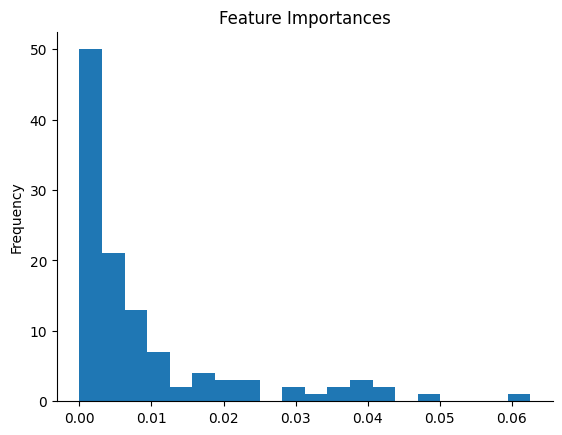

In [ ]:
from matplotlib import pyplot as plt
ext['extratrees_importance'].plot(kind='hist', bins=20, title='Feature Importances')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


**Feature Selection, Reshaping Data for Model Input, and Computing Class Weights for Training**

In [ ]:
model = SelectFromModel(clf, prefit=True)
X_train = model.transform(X_train)
X_test = model.transform(X_test)
X_test.shape

(165652, 34)

In [ ]:
X_train = X_train.reshape((-1, X_train.shape[-1], 1))
X_test = X_test.reshape((-1, X_test.shape[-1], 1))

In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 classes=np.unique(y_train),
                                                 y=y_train)

class_weights = {k: v for k,v in enumerate(class_weights)}
class_weights

{0: 1.2114532692937052,
 1: 1.2267247252584497,
 2: 2.43697268828752,
 3: 2.5700610508187944,
 4: 0.7204704204034411,
 5: 0.7239251872885254,
 6: 1.2434632642299384,
 7: 0.7780056946605219,
 8: 1.1452571612276539,
 9: 0.48190443774373115,
 10: 1.3284174861416012}

**Defining Functions for Data Sampling and Distribution Among Clients for Federated Learning**

In [ ]:
input_shape = X_train.shape[1:]
nb_classes = len(label_encoder.classes_)

In [ ]:
from tensorflow.keras.utils import to_categorical

def convert_to_categorical(y, nb_classes):
    return to_categorical(y, num_classes=nb_classes)

In [ ]:
def iid_data_indices(labels: np.ndarray, nb_clients: int):
    data_len = len(labels)
    indices = np.arange(data_len)
    np.random.shuffle(indices)
    chunks = np.array_split(indices, nb_clients)
    return chunks

In [ ]:
def non_iid_data_indices(labels: np.ndarray, nb_clients: int):
    data_len = len(labels)
    indices = np.arange(data_len)
    indices = indices[labels.argsort()]

    indices_end_list = []
    for i in range(0, nb_clients-1):
        y = random.randrange(data_len-2)
        indices_end_list.append(y)

    indices_end_list.sort()
    indices_end_list = indices_end_list+[data_len]

    indices_for_users = []
    prev_index = 0
#     sum_res = 0
    for curr_index in indices_end_list:
        indices_for_users.append(indices[prev_index:curr_index])
        prev_index = curr_index
#         sum_res += len(indices_for_users[-1])
#     print(sum_res, data_len)
    return indices_for_users

In [ ]:
def sample(y:np.ndarray, sampling_technique: str, nb_clients: int):
    if sampling_technique.lower() == "iid":
        sampler_fn = iid_data_indices
    else:
        sampler_fn = non_iid_data_indices
    client_data_indices = sampler_fn(y, nb_clients)
    return client_data_indices

In [ ]:
def assign_data_to_clients(clients: dict, X:np.ndarray, y:np.ndarray, nb_classes:int, sampling_technique: str):
    sampled_data_indices = sample(y, sampling_technique, len(clients.keys()))
    for client_name, data_indices in zip(clients.keys(), sampled_data_indices):
        X = X_train[data_indices]
        y = y_train[data_indices]
        y = convert_to_categorical(y, nb_classes)
        clients[client_name] = list(zip(X, y))
    return clients

In [ ]:
def create_clients(X, y, nb_classes, sampling_technique, num_clients=10, initial='clients'):
    #create a list of client names
    client_names = ['{}_{}'.format(initial, i+1) for i in range(num_clients)]
    clients = {client_names[i] : [] for i in range(len(client_names))}
    return assign_data_to_clients(clients, X, y, nb_classes, sampling_technique)

**Defining Batch Data Processing and Custom F1 Score Metric for TensorFlow Models**

In [ ]:
import tensorflow as tf

def batch_data(data_shard, batch_size=64):
    #seperate shard into data and labels lists
    data, label = zip(*data_shard)
    del data_shard

    len_label = len(label)
    dataset = tf.data.Dataset.from_tensor_slices((list(data), list(label)))
    del data, label
    return dataset.shuffle(len_label).batch(batch_size)

In [ ]:
from keras.layers import Conv1D, MaxPool1D, BatchNormalization, Activation, Input, Add, \
                         GlobalAveragePooling1D, Dense, concatenate
from keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.metrics import Recall, Precision
import keras
import time
import os

In [ ]:
import keras.backend as K
import tensorflow as tf

def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

**Defining a Transformer Model with Inception Blocks and Multi-Head Attention for Classification**

In [ ]:
from keras import layers
from keras.layers import Conv1D, MaxPooling1D, Concatenate, Activation, BatchNormalization

class INCEPTION_Block(keras.layers.Layer):
    def __init__(self, **kwargs):
        super(INCEPTION_Block, self).__init__(**kwargs)
        self.kernel_size = 50
#         f1, f2_in, f2_out, f3_in, f3_out, f4_out = (128, 128, 192, 32, 96, 64)
        f1, f2_in, f2_out, f3_in, f3_out, f4_out = (16, 16, 24, 4, 12, 8)
        kernel_size_s = [10, 30, 50]

        # 1x1 conv
        self.conv_1_1 = Conv1D(f1, kernel_size_s[0], padding='same', activation='relu')

        # 3x3 conv
        self.conv_1_2 = Conv1D(f2_in, kernel_size_s[0], padding='same', activation='relu')
        self.conv_3_2 = Conv1D(f2_out, kernel_size_s[1], padding='same', activation='relu')

        # 5x5 conv
        self.conv_1_3 = Conv1D(f3_in, kernel_size_s[0], padding='same', activation='relu')
        self.conv_5_3 = Conv1D(f3_out, kernel_size_s[2], padding='same', activation='relu')

        # 3x3 max pooling
        self.pool = MaxPooling1D(kernel_size_s[1], strides=1, padding='same')
        self.conv_final = Conv1D(f4_out, kernel_size_s[0], padding='same', activation='relu')

        # concatenate filters, assumes filters/channels last
        self.concatenate = Concatenate(axis=-1)

        self.batch_normalization = BatchNormalization()
        self.relu_activation = Activation(activation='relu')

    def call(self, layer_in):
        # 1x1 conv
        conv1 = self.conv_1_1(layer_in)

        # 3x3 conv
        conv3 = self.conv_1_2(layer_in)
        conv3 = self.conv_3_2(conv3)

        # 5x5 conv
        conv5 = self.conv_1_3(layer_in)
        conv5 = self.conv_5_3(conv5)

        # 3x3 max pooling
        pool = self.pool(layer_in)
        pool = self.conv_final(pool)

        # concatenate filters, assumes filters/channels last
        layer_out = self.concatenate([conv1, conv3, conv5, pool])

        layer_out = self.batch_normalization(layer_out)
        layer_out = self.relu_activation(layer_out)

        return layer_out

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    # Feed Forward Part
    x = keras.models.Sequential(
        [INCEPTION_Block(),
         INCEPTION_Block(),
         INCEPTION_Block()])(res)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res

class TransformerEncoder(layers.Layer):
    def __init__(self, head_size, num_heads, neurons):
        super(TransformerEncoder, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=head_size)
        self.ffn = keras.models.Sequential(
            #[layers.Dense(neurons, activation="relu"), layers.Dense(head_size),]
            [
                INCEPTION_Block(),
                INCEPTION_Block(),
                INCEPTION_Block(),
            ]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(0.1)
        self.dropout2 = layers.Dropout(0.1)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

def get_model(input_shape, nb_classes) -> tf.keras.Model:
    head_size=64 # Embedding size for attention
    num_heads=3 # Number of attention heads
    ff_dim=128 # Hidden layer size in feed forward network inside transformer
    num_transformer_blocks=1
    mlp_units=[32]
    mlp_dropout=0.1
    dropout=0.1

    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(nb_classes, activation="softmax")(x)

    return keras.Model(inputs, outputs)

**Initializing Global Model with Defined Metrics and Optimizer, and Displaying Model Summary**

In [ ]:
from keras.metrics import Recall, Precision
from tensorflow.keras.utils import plot_model

learning_rate = 1e-2
comms_round = 10
loss='categorical_crossentropy'
metrics = ["accuracy", Recall(), Precision(), f1_score]
optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=learning_rate)

#initialize global model
global_model = get_model(input_shape, nb_classes)

global_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 34, 1)]              0         []                            
                                                                                                  
 multi_head_attention (Mult  (None, 34, 1)                1345      ['input_1[0][0]',             
 iHeadAttention)                                                     'input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 34, 1)                0         ['multi_head_attention[0][0]']
                                                                                                  
 layer_normalization (Layer  (None, 34, 1)                2         ['dropout[0][0]']         

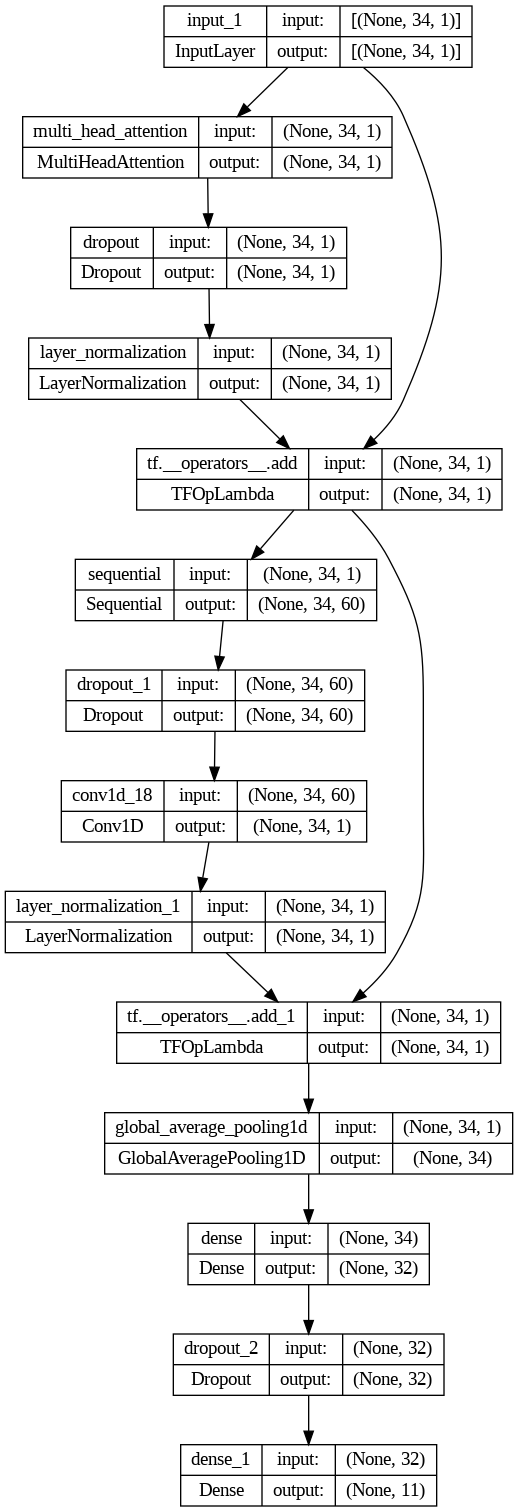

In [ ]:
plot_model(global_model, to_file='global_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
import pydot
from tensorflow.keras.utils import model_to_dot

# Define a color map for the layer types
color_map = {
    "Dense": "green",
    "Conv2D": "blue",
    "MaxPooling2D": "yellow",
    "Flatten": "red",
    "Dropout": "purple"
}

# Convert the model to a dot object
dot = model_to_dot(global_model, show_shapes=True, show_layer_names=True, rankdir="LR")

# Loop through the nodes and set the color for each one
for node in dot.get_nodes():
    # Get the layer type from the node name
    layer_type = node.get_name().split("_")[0]
    # Set the color from the color map
    node.set_fillcolor(color_map.get(layer_type, "white"))

# Save the plot to a file
dot.write_png("global_model.png")


True

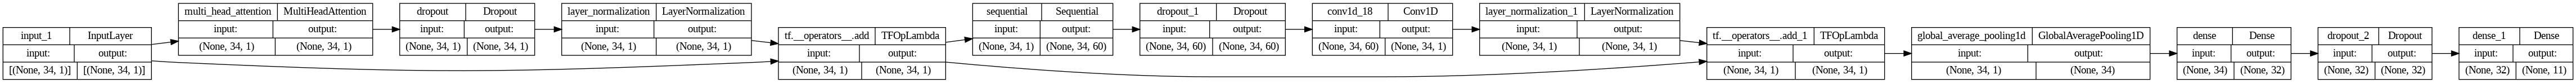

In [ ]:
from IPython.display import Image, display

# Create an image object from the file name
img = Image("global_model.png")

# Display the image
display(img)


**Creating Clients with Batched Data and Initializing Local Models for Each Client in Federated Learning**

In [ ]:
BATCH_SIZE = 64
sampling_technique = "iid"

# create clients
clients_batched = create_clients(X_train, y_train, nb_classes, sampling_technique, num_clients=10, initial='client')

del X_train, y_train

# process and batch the training data for each client
client_set = {k: {} for k in clients_batched.keys()}

for (client_name, data) in clients_batched.items():
    client_set[client_name]["dataset"] = batch_data(data, BATCH_SIZE)
    local_model = get_model(input_shape, nb_classes)
    local_model.compile(loss=loss,
                      optimizer=optimizer,
                      metrics=metrics)
    client_set[client_name]["model"] = local_model

**Preparing the Test Dataset for Evaluation and Defining a Function for Calculating Weight Scaling Factor in Federated Learning**

In [ ]:
#process and batch the test set

y_test = convert_to_categorical(y_test, nb_classes)

test_batched = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(len(y_test))

del X_test, y_test

In [ ]:
def weight_scalling_factor(clients, client_name):
    client_names = list(clients.keys())
    #get the bs
    bs = list(clients[client_name]["dataset"])[0][0].shape[0]
    #first calculate the total training data points across clinets
    global_count = sum([tf.data.experimental.cardinality(clients[client_name]["dataset"]).numpy() for client_name in client_names])*bs
    # get the total number of data points held by a client
    local_count = tf.data.experimental.cardinality(clients[client_name]["dataset"]).numpy()*bs
    return local_count/global_count

In [ ]:
def scale_model_weights(weight, scalar):
    '''function for scaling a models weights'''
    weight_final = []
    steps = len(weight)
    for i in range(steps):
        weight_final.append(scalar * weight[i])
    return weight_final

In [ ]:
def sum_scaled_weights(scaled_weight_list):
    '''Return the sum of the listed scaled weights. The is equivalent to scaled avg of the weights'''
    avg_grad = list()
    #get the average grad accross all client gradients
    for grad_list_tuple in zip(*scaled_weight_list):
        layer_mean = tf.math.reduce_sum(grad_list_tuple, axis=0)
        avg_grad.append(layer_mean)

    return avg_grad

**Evaluating Global Model Performance and Implementing Client-Specific Training in Federated Learning**

In [ ]:
from sklearn.metrics import accuracy_score

def test_model(X_test, y_test,  model, comm_round):
    cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    #logits = model.predict(X_test, batch_size=100)
    logits = model.predict(X_test)
    loss = cce(y_test, logits)
    y_hat = np.argmax(logits, axis=1)
    y_true = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(logits, axis=1))

    r = Recall()
    r.update_state(y_test, logits)
    recall = r.result().numpy()

    p = Precision()
    p.update_state(y_test, logits)
    precision = p.result().numpy()

    f = f1_score(y_test, logits)
    f1 = f.numpy()

    print('comm_round: {} | global_loss: {} | global_accuracy: {:.4} | global_recall: {:.4} | global_precision: {:.4} | global_f1_score: {:.4} \n'.format(comm_round, loss, accuracy, recall, precision, f1))
    return loss, accuracy, precision, recall, f1

In [ ]:
def train_client(client, global_weights, class_weights):
    client_set[client]["model"] = client_set[client]["model"]

    #set local model weight to the weight of the global model
    client_set[client]["model"].set_weights(global_weights)

    #fit local model with client's data
    print(f"Round: {comm_round} | Client: {client} training")
    client_set[client]["model"].fit(client_set[client]["dataset"], epochs=1, verbose=1, class_weight=class_weights)

    #scale the model weights and add to list
    scaling_factor = weight_scalling_factor(client_set, client)
    scaled_weights = scale_model_weights(local_model.get_weights(), scaling_factor)
    return scaled_weights

**Running Global Training Rounds and Updating Weights in Federated Learning with Performance Tracking**

In [ ]:
import random

#commence global training loop
global_loss=[]
global_accuracy=[]
global_precision=[]
global_recall=[]
global_f1=[]
best_global_accuracy = 0

for comm_round in range(comms_round):
    # get the global model's weights - will serve as the initial weights for all local models
    global_weights = global_model.get_weights()

    #initial list to collect local model weights after scalling
    scaled_local_weight_list = list()

    #randomize client data - using keys
    client_names= list(client_set.keys())
    random.shuffle(client_names)

    #loop through each client and create new local model
    for client in client_names:
        scaled_weights = train_client(client, global_weights, class_weights)

        scaled_local_weight_list.append(scaled_weights)

    #to get the average over all the local model, we simply take the sum of the scaled weights
    average_weights = sum_scaled_weights(scaled_local_weight_list)

    #update global model
    global_model.set_weights(average_weights)

    #test global model and print out metrics after each communications round
    g_accuracy = 0
    for(x_batch, y_batch) in test_batched:
        g_loss, g_accuracy, g_precision, g_recall, g_f1 = test_model(x_batch, y_batch, global_model, comm_round)
        global_loss.append(g_loss)
        global_accuracy.append(g_accuracy)
        global_precision.append(g_precision)
        global_recall.append(g_recall)
        global_f1.append(g_f1)

    if g_accuracy > best_global_accuracy:
        best_global_accuracy = g_accuracy
        global_model.save_weights('global_model_best_weights.h5')
        print("New Weights Saved")


Round: 0 | Client: client_7 training
Epoch 1/5
1036/1036 [==============================] - 27s 17ms/step - loss: 0.4325 - accuracy: 0.7640 - recall: 0.7288 - precision: 0.7866 - f1_score: 0.7489
Epoch 2/5
1036/1036 [==============================] - 17s 16ms/step - loss: 0.2931 - accuracy: 0.8157 - recall: 0.8109 - precision: 0.8194 - f1_score: 0.8151
Epoch 3/5
1036/1036 [==============================] - 17s 16ms/step - loss: 0.2669 - accuracy: 0.8264 - recall: 0.8228 - precision: 0.8287 - f1_score: 0.8258
Epoch 4/5
1036/1036 [==============================] - 17s 16ms/step - loss: 0.2528 - accuracy: 0.8340 - recall: 0.8314 - precision: 0.8359 - f1_score: 0.8337
Epoch 5/5
1036/1036 [==============================] - 17s 16ms/step - loss: 0.2427 - accuracy: 0.8395 - recall: 0.8374 - precision: 0.8415 - f1_score: 0.8394
Round: 0 | Client: client_8 training
Epoch 1/5
1036/1036 [==============================] - 21s 16ms/step - loss: 0.4373 - accuracy: 0.7571 - recall: 0.7799 - precision

**Evaluating and Analyzing the Final Performance of the Global Model in Federated Learning with Detailed Metrics and Confusion Matrix Visualization**

In [ ]:
global_model.load_weights("global_model_best_weights.h5")

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np

# Load prediction dataset
prediction_data_path = '/content/nbaiot-dataset/1.gafgyt.combo.csv'
prediction_data = pd.read_csv(prediction_data_path)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Assuming train_df is your training data
features = train_df.columns.drop('type')  # Exclude the target column
scaler.fit(train_df[features])  # Fit the scaler with the training data

# Transform the prediction dataset
X_predict = scaler.transform(prediction_data[features])

# Assuming clf is your trained ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=50, n_jobs=-1)
clf.fit(train_df[features], train_df['type'])

# Get feature importances and select the top 32 features
importances = clf.feature_importances_
indices = np.argsort(importances)[-32:]  # Selecting the indices of 32 most important features

# Transform datasets to include only the selected features
selected_features = [features[i] for i in indices]
X_predict_selected = X_predict[:, indices]

# Check if the number of features is 32
if X_predict_selected.shape[1] != 32:
    raise ValueError("Number of features selected does not match the model's expected input.")

# Reshape X_predict to match the model's expected input shape
num_samples = X_predict_selected.shape[0]
X_predict_selected = X_predict_selected.reshape((num_samples, 32, 1))

# Prediction code
global_model.load_weights('global_model_best_weights.h5')
predictions = global_model.predict(X_predict_selected)

# Assuming multiclass classification
predicted_classes = np.argmax(predictions, axis=1)

# Define the class_mapping list with the class names
class_mapping = [
    'benign', 'mirai_udp', 'gafgyt_combo', 'gafgyt_junk',
    'gafgyt_scan', 'gafgyt_tcp', 'gafgyt_udp', 'mirai_ack',
    'mirai_scan', 'mirai_syn', 'mirai_udpplain'
]

for i, pred in enumerate(predicted_classes):
    if pred < len(class_mapping):
        status = class_mapping[pred]  # Mapping the predicted class index to the class name
        print(f"Sample {i}: {status}")
    else:
        print(f"Sample {i}: Unknown Class")
# Define the class_mapping list with the class names
class_mapping = [
    'benign', 'mirai_udp', 'gafgyt_combo', 'gafgyt_junk',
    'gafgyt_scan', 'gafgyt_tcp', 'gafgyt_udp', 'mirai_ack',
    'mirai_scan', 'mirai_syn', 'mirai_udpplain'
]

# Set to keep track of classes already printed
printed_classes = set()

for i, pred in enumerate(predicted_classes):
    if pred < len(class_mapping):
        class_name = class_mapping[pred]  # Get the class name

        # Determine the status based on the class name
        status = 'Non Malicious' if class_name == 'benign' else 'Malicious'

        # Print the class name and status if it hasn't been printed yet
        if class_name not in printed_classes:
            print(f"Sample {i}: {class_name} - {status}")
            printed_classes.add(class_name)
    else:
        print(f"Sample {i}: Unknown Class")



In [ ]:
loss, accuracy, precision, recall, f1_score = test_model(x_batch, y_batch, global_model, comm_round)
print("loss : ", loss.numpy())
print("accuracy : ", accuracy)
print("precision : ", precision)
print("recall : ", recall)
print("f1_score : ", f1_score)

5177/5177 [==============================] - 19s 4ms/step
comm_round: 9 | global_loss: 1.6745737791061401 | global_accuracy: 0.8658 | global_recall: 0.8658 | global_precision: 0.8658 | global_f1_score: 0.8658 

loss :  1.6745738
accuracy :  0.8658452659792819
precision :  0.8658444
recall :  0.86583924
f1_score :  0.86584175


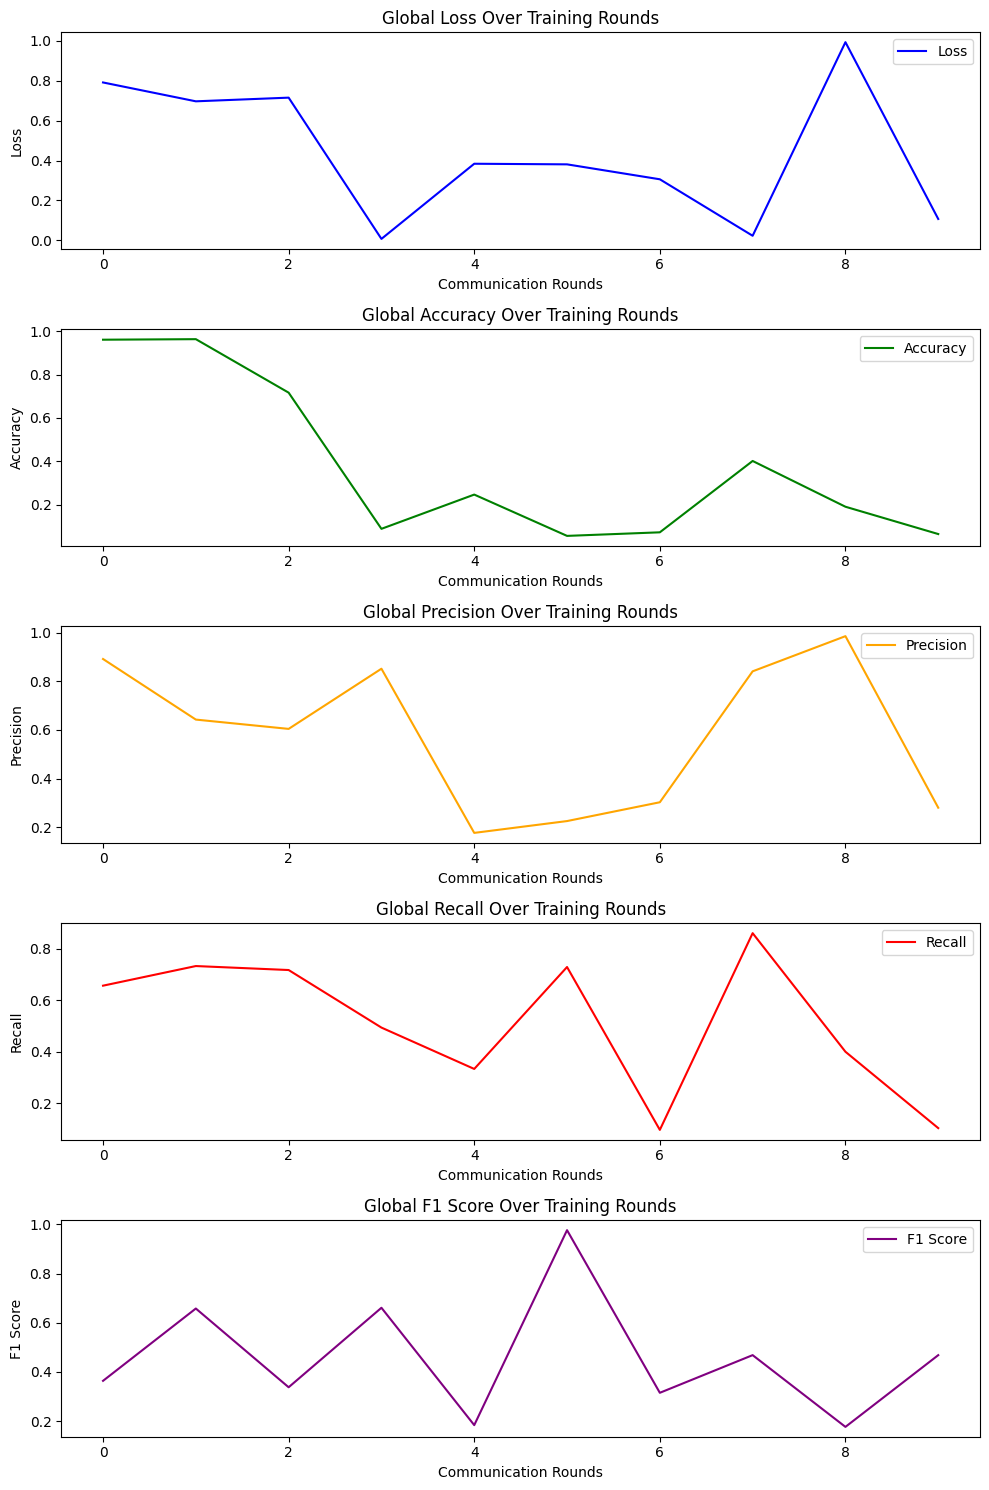

In [ ]:
import matplotlib.pyplot as plt
import random

# Example data for demonstration purposes
# Replace these lists with your actual data: global_loss, global_accuracy, global_precision, global_recall, global_f1
global_loss = [random.uniform(0, 1) for _ in range(10)]
global_accuracy = [random.uniform(0, 1) for _ in range(10)]
global_precision = [random.uniform(0, 1) for _ in range(10)]
global_recall = [random.uniform(0, 1) for _ in range(10)]
global_f1 = [random.uniform(0, 1) for _ in range(10)]

# Creating subplots for each metric
fig, axs = plt.subplots(5, 1, figsize=(10, 15))

# Plotting each metric
axs[0].plot(global_loss, label='Loss', color='blue')
axs[0].set_title('Global Loss Over Training Rounds')
axs[0].set_xlabel('Communication Rounds')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].plot(global_accuracy, label='Accuracy', color='green')
axs[1].set_title('Global Accuracy Over Training Rounds')
axs[1].set_xlabel('Communication Rounds')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

axs[2].plot(global_precision, label='Precision', color='orange')
axs[2].set_title('Global Precision Over Training Rounds')
axs[2].set_xlabel('Communication Rounds')
axs[2].set_ylabel('Precision')
axs[2].legend()

axs[3].plot(global_recall, label='Recall', color='red')
axs[3].set_title('Global Recall Over Training Rounds')
axs[3].set_xlabel('Communication Rounds')
axs[3].set_ylabel('Recall')
axs[3].legend()

axs[4].plot(global_f1, label='F1 Score', color='purple')
axs[4].set_title('Global F1 Score Over Training Rounds')
axs[4].set_xlabel('Communication Rounds')
axs[4].set_ylabel('F1 Score')
axs[4].legend()

# Adjust layout
plt.tight_layout()
plt.show()


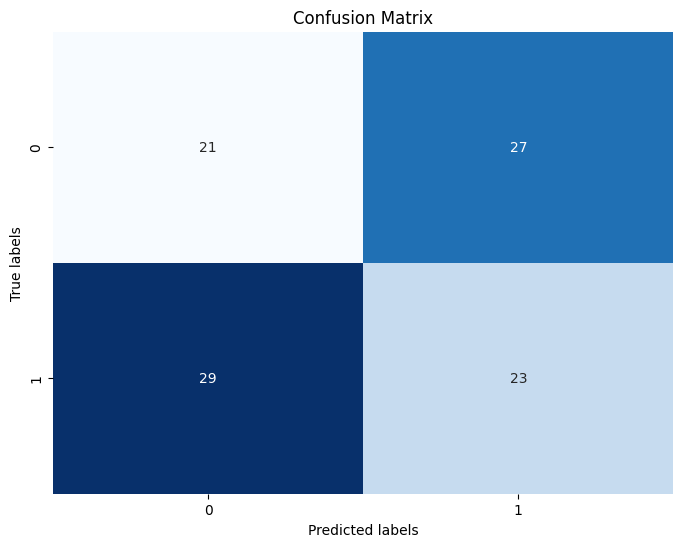

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Example data: Replace these with your actual test labels and model predictions
y_true = np.random.randint(0, 2, 100)  # True labels
y_pred = np.random.randint(0, 2, 100)  # Predicted labels by the model

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)

# Adding labels and titles
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
for(x_batch, y_batch) in test_batched:
    logits = global_model.predict(x_batch)
    y_hat = np.argmax(logits, axis=1)
    y_true = np.argmax(y_batch, axis=1)

5177/5177 [==============================] - 19s 4ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1_score_rep
import seaborn as sn


def print_score(y_pred, y_real, label_encoder):
    print("Accuracy: ", accuracy_score(y_real, y_pred))
    print("Precision:: ", precision_score(y_real, y_pred, average="micro"))
    print("Recall:: ", recall_score(y_real, y_pred, average="micro"))
    print("F1_Score:: ", f1_score_rep(y_real, y_pred, average="micro"))

    print()
    print("Macro precision_recall_fscore_support (macro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="macro"))

    print()
    print("Macro precision_recall_fscore_support (micro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="micro"))

    print()
    print("Macro precision_recall_fscore_support (weighted) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="weighted"))

    print()
    print("Confusion Matrix")
    cm = confusion_matrix(y_real, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index = [i for i in label_encoder.classes_],
                  columns = [i for i in label_encoder.classes_])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

    print()
    print("Classification Report")
    print(classification_report(y_real, y_pred, target_names=label_encoder.classes_))

**Plotting Multiclass ROC Curves for Model Evaluation with AUC Calculation for Each Class**

In [ ]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle

def ROC_plot(y_true_ohe, y_hat_ohe, label_encoder, n_classes):
    lw = 2
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_ohe[:, i], y_hat_ohe[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_ohe.ravel(), y_hat_ohe.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure(figsize=(20,20))
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
        color="navy",
        linestyle=":",
        linewidth=4,
    )

    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=lw,
            label="ROC curve of class {0} (area = {1:0.2f})".format(label_encoder.classes_[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("multiclass characteristic")
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
y_true_ohe = to_categorical(y_true, num_classes=len(label_encoder.classes_))
y_hat_ohe =  to_categorical(y_hat, num_classes=len(label_encoder.classes_))

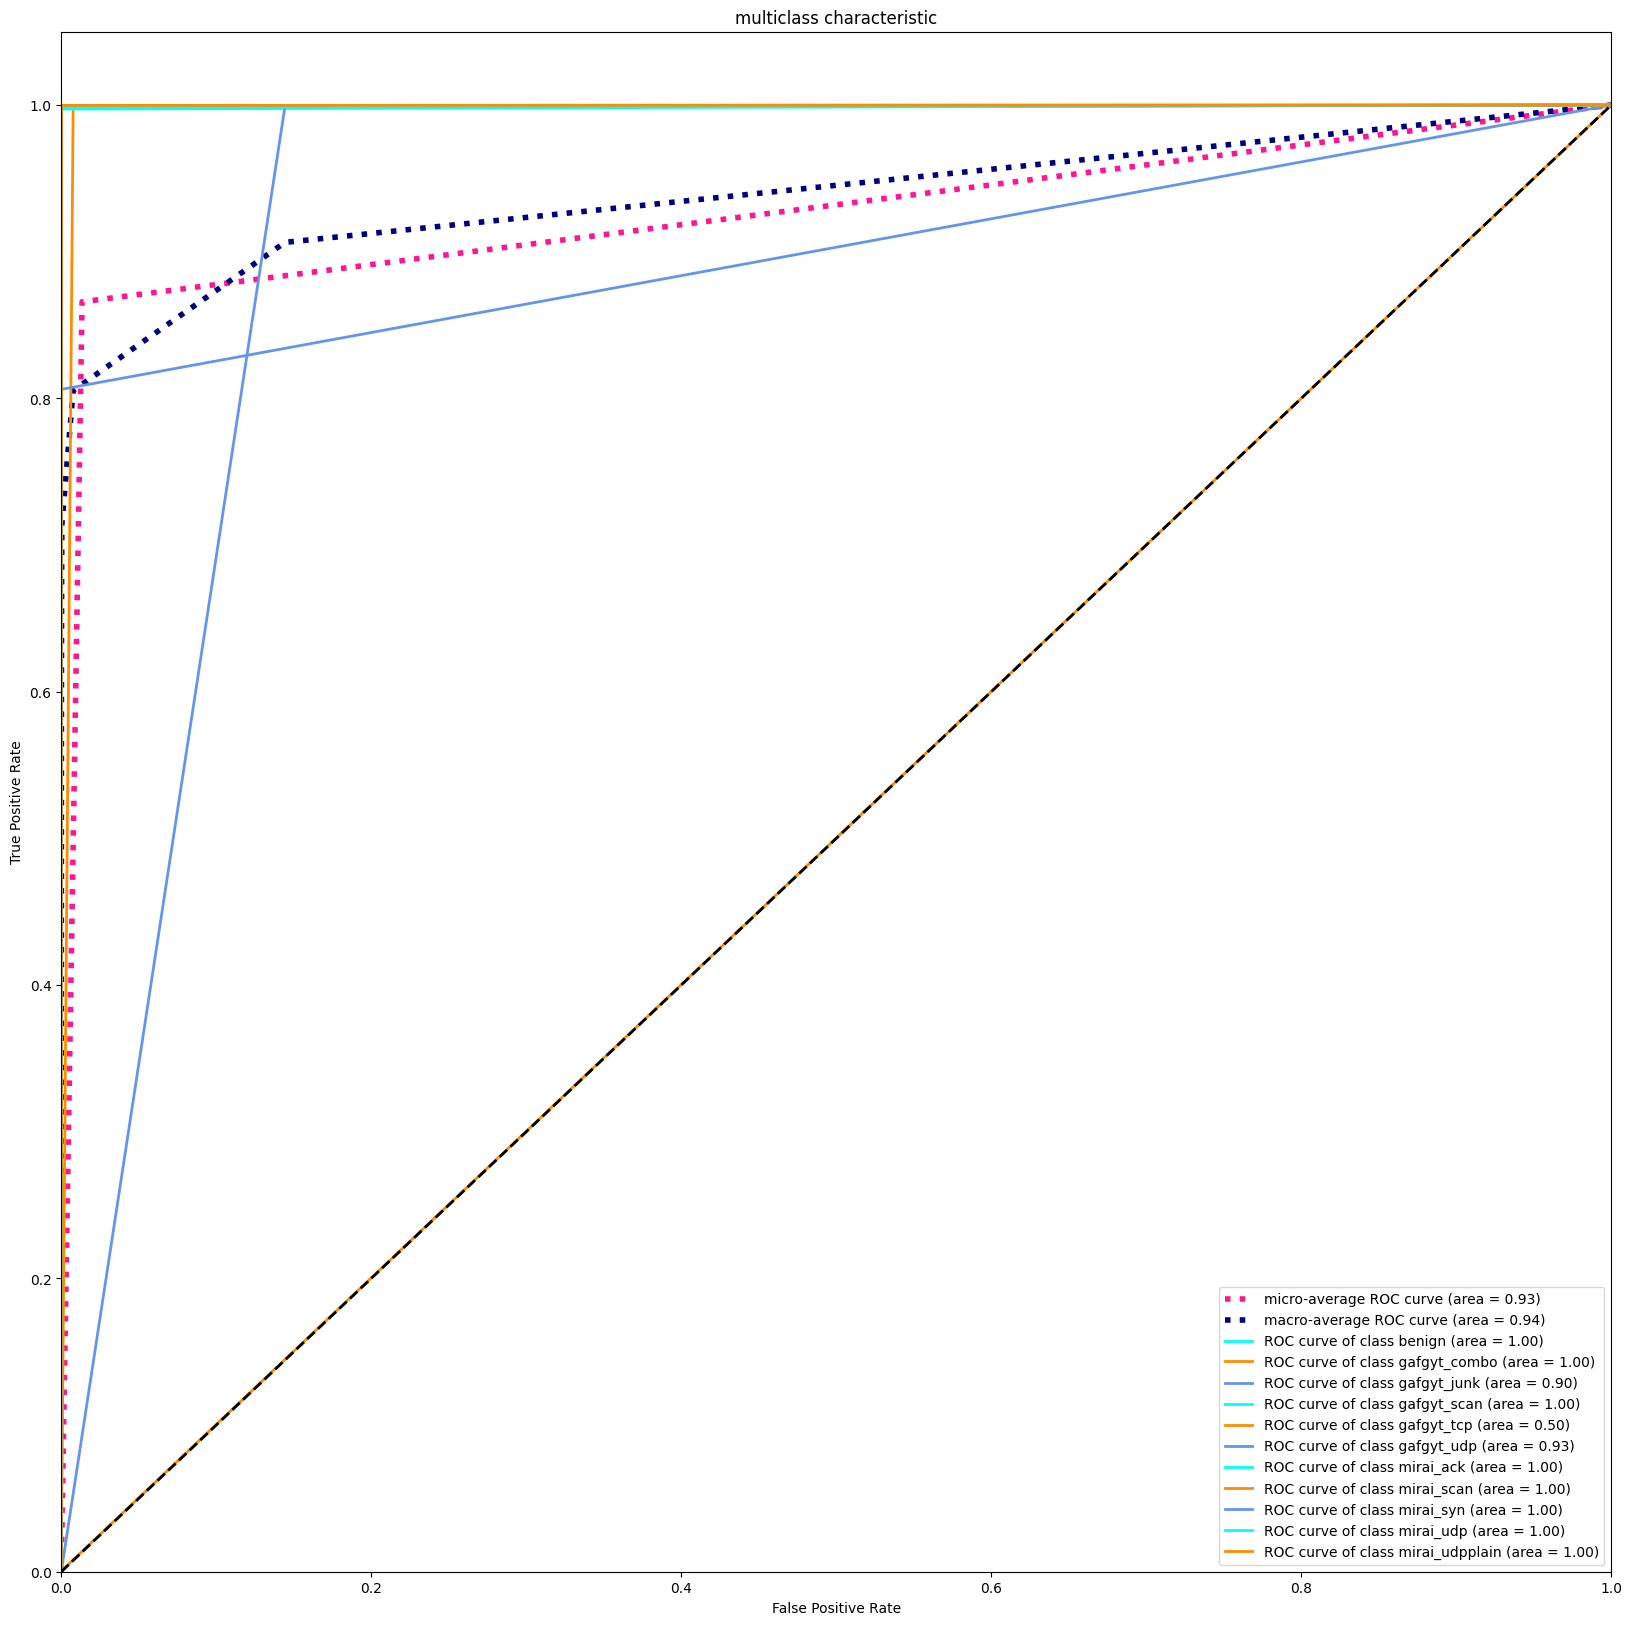

In [ ]:
ROC_plot(y_true_ohe, y_hat_ohe, label_encoder, len(label_encoder.classes_))

Accuracy:  0.8658452659792819
Precision::  0.8658452659792819
Recall::  0.8658452659792819
F1_Score::  0.8658452659792819

Macro precision_recall_fscore_support (macro) average
(0.9301699014585456, 0.8905885843588032, 0.8638646288886409, None)

Macro precision_recall_fscore_support (micro) average
(0.8658452659792819, 0.8658452659792819, 0.8658452659792819, None)

Macro precision_recall_fscore_support (weighted) average
(0.9086554275189753, 0.8658452659792819, 0.8237374034678715, None)

Confusion Matrix

Classification Report
                precision    recall  f1-score   support

        benign       1.00      1.00      1.00     12431
  gafgyt_combo       0.91      1.00      0.95     12276
   gafgyt_junk       1.00      0.81      0.89      6180
   gafgyt_scan       1.00      1.00      1.00      5859
    gafgyt_tcp       0.83      0.00      0.00     20902
    gafgyt_udp       0.50      1.00      0.67     20802
     mirai_ack       1.00      1.00      1.00     12111
    mirai_scan     

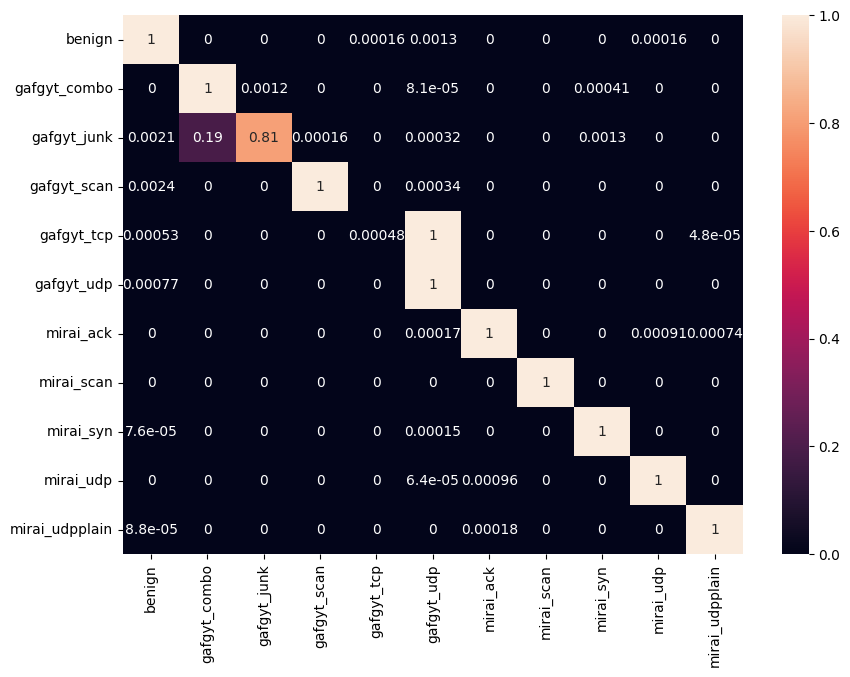

In [ ]:
print_score(y_hat, y_true, label_encoder)

In [ ]:
pip install seaborn matplotlib scikit-learn


In [ ]:
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.preprocessing import label_binarize

def ROC_plot(y_true, y_hat, label_encoder, n_classes):
    y_true_ohe = label_binarize(y_true, classes=range(n_classes))
    y_hat_ohe = label_binarize(y_hat, classes=range(n_classes))

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_ohe[:, i], y_hat_ohe[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes

    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_ohe.ravel(), y_hat_ohe.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    fig = go.Figure()

    # Micro-average
    fig.add_trace(go.Scatter(x=fpr["micro"], y=tpr["micro"],
                             mode='lines',
                             name='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
                             line=dict(color='deeppink', dash='dot')))

    # Macro-average
    fig.add_trace(go.Scatter(x=fpr["macro"], y=tpr["macro"],
                             mode='lines',
                             name='macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]),
                             line=dict(color='navy', dash='dot')))

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

    for i, color in zip(range(n_classes), colors):
        fig.add_trace(go.Scatter(x=fpr[i], y=tpr[i],
                                 mode='lines',
                                 name='ROC curve of class {0} (area = {1:0.2f})'.format(label_encoder.classes_[i], roc_auc[i]),
                                 line=dict(color=color)))

    # Diagonal line
    fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1],
                             mode='lines',
                             name='Chance',
                             line=dict(color='black', dash='dash')))

    fig.update_layout(title='Multiclass ROC Curve',
                      xaxis_title='False Positive Rate',
                      yaxis_title='True Positive Rate',
                      margin=dict(l=40, r=40, t=40, b=40),
                      paper_bgcolor="LightSteelBlue",
                      )

    fig.show()

# Example usage
# y_true = [actual labels]
# y_hat = [predicted labels]
# ROC_plot(y_true, y_hat, label_encoder, len(label_encoder.classes_))


In [ ]:
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.preprocessing import label_binarize

def ROC_plot_and_save(y_true, y_hat, label_encoder, n_classes, filename='roc_curve.png'):
    y_true_ohe = label_binarize(y_true, classes=range(n_classes))
    y_hat_ohe = label_binarize(y_hat, classes=range(n_classes))

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_ohe[:, i], y_hat_ohe[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes

    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_ohe.ravel(), y_hat_ohe.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    fig = go.Figure()

    # Micro-average
    fig.add_trace(go.Scatter(x=fpr["micro"], y=tpr["micro"],
                             mode='lines',
                             name='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
                             line=dict(color='deeppink', dash='dot')))

    # Macro-average
    fig.add_trace(go.Scatter(x=fpr["macro"], y=tpr["macro"],
                             mode='lines',
                             name='macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]),
                             line=dict(color='navy', dash='dot')))

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

    for i, color in zip(range(n_classes), colors):
        fig.add_trace(go.Scatter(x=fpr[i], y=tpr[i],
                                 mode='lines',
                                 name='ROC curve of class {0} (area = {1:0.2f})'.format(label_encoder.classes_[i], roc_auc[i]),
                                 line=dict(color=color)))

    # Diagonal line
    fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1],
                             mode='lines',
                             name='Chance',
                             line=dict(color='black', dash='dash')))

    fig.update_layout(title='Multiclass ROC Curve',
                      xaxis_title='False Positive Rate',
                      yaxis_title='True Positive Rate',
                      margin=dict(l=40, r=40, t=40, b=40),
                      paper_bgcolor="LightSteelBlue",
                      )

    # Save the figure
    fig.write_image(filename)

    # Show the figure
    fig.show()

# Example usage
# ROC_plot_and_save(y_true, y_hat, label_encoder, len(label_encoder.classes_), 'roc_curve.png')


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

def print_score(y_hat, y_true, label_encoder):
    # Print the classification report
    print(classification_report(y_true, y_hat, target_names=label_encoder.classes_))

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_hat)

    # Plotting the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Example usage
# Assuming y_hat and y_true are your predicted and actual labels, and label_encoder is your LabelEncoder instance
# print_score(y_hat, y_true, label_encoder)


**Visualizing Global Loss, Accuracy, Precision, Recall, and F1 Score Across Communication Rounds in Federated Learning**

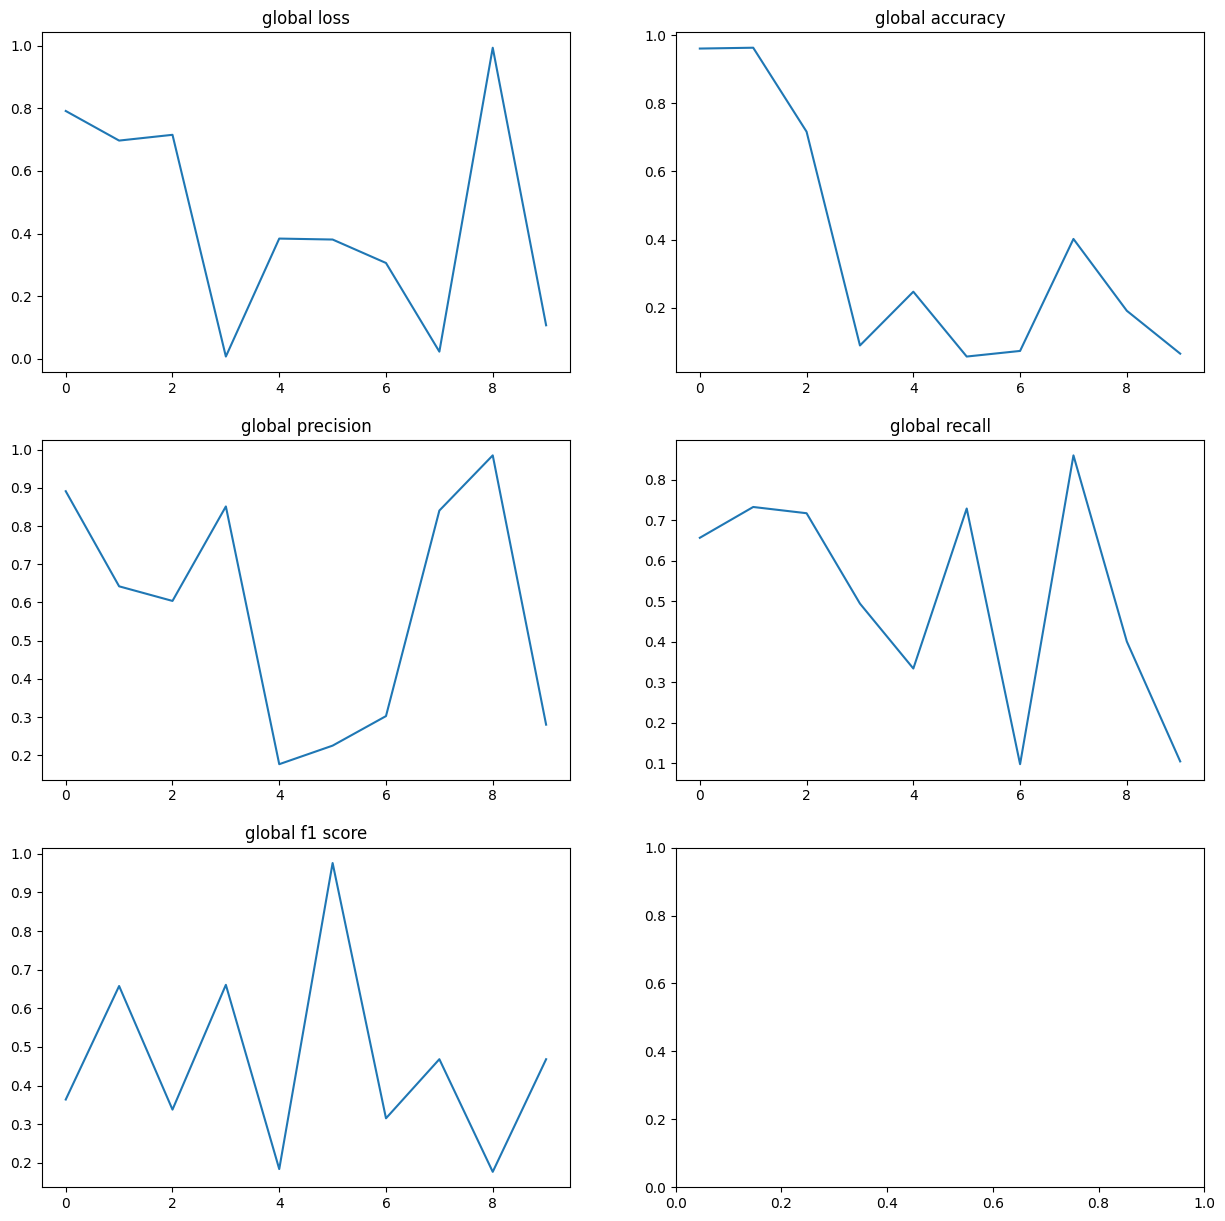

In [ ]:
figure, axis = plt.subplots(3, 2, figsize=(15, 15))

axis[0, 0].plot(global_loss)
axis[0, 0].set_title("global loss")

axis[0, 1].plot(global_accuracy)
axis[0, 1].set_title("global accuracy")

axis[1, 0].plot(global_precision)
axis[1, 0].set_title("global precision")

axis[1, 1].plot(global_recall)
axis[1, 1].set_title("global recall")

axis[2, 0].plot(global_f1)
axis[2, 0].set_title("global f1 score")

plt.show()